# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file C:\Users\jonat\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\jonat\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(q='bitcoin AND Bitcoin',
                                  language='en',
                                  page_size=100,
                                  sort_by='relevancy'
                                 )
btc_headlines["articles"][0]

{'source': {'id': None, 'name': 'New York Times'},
 'author': 'Katie Benner',
 'title': 'Justice Dept. Announces Raft of Changes Meant to Deter Cyberthreats',
 'description': 'The moves came a week after the department made its largest financial seizure ever, confiscating over $3.6 billion worth of Bitcoin stolen in a 2016 hacking.',
 'url': 'https://www.nytimes.com/2022/02/17/us/politics/justice-department-cybersecurity.html',
 'urlToImage': 'https://static01.nyt.com/images/2022/02/17/us/politics/17dc-justice/merlin_199612353_b05bfb07-3da8-404e-8a75-221181e5d014-facebookJumbo.jpg',
 'publishedAt': '2022-02-17T23:51:49Z',
 'content': 'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]'}

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(q='ethereum AND Ethereum',
                                  language='en',
                                  page_size=100,
                                  sort_by='relevancy'
                                 )
eth_headlines["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the BTC sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
2,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
3,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
4,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the ETH sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956
4,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.059214,0.069560,0.048780,0.881660
std,0.432667,0.069414,0.061065,0.083667
min,-0.895700,0.000000,0.000000,0.694000
25%,-0.255800,0.000000,0.000000,0.834750
50%,0.000000,0.062000,0.000000,0.890000
75%,0.401900,0.096500,0.084000,0.940750
max,0.910000,0.301000,0.265000,1.000000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.152725,0.076640,0.039210,0.88412
std,0.418904,0.069911,0.058225,0.08371
min,-0.913600,0.000000,0.000000,0.68800
25%,0.000000,0.000000,0.000000,0.83600
50%,0.165500,0.069000,0.000000,0.89100
75%,0.505200,0.112250,0.064500,0.94400
max,0.862500,0.290000,0.312000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a highert mean positive sentiment score at 0.076640 versus 0.069560 for Bitcoin.

Q: Which coin had the highest compound score?

A: Bitcoin had a higher max compound score at 0.91 compared to 0.8625 for Ethereum.

Q. Which coin had the highest positive score?

A: Bitcoin had a higher max positivie score at 0.301 compared to 0.29 for Ethereum.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw.append("'s")
sw.append("chars")
sw.append("charsthe")
sw.append("say")
sw.append("said")
sw.append("ha")
sw.append("will")
sw = set(sw)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in tokens if word.lower() not in sw]
    
    # Remove the stop words
    tokens = list(filter(lambda w: w.lower(), tokens))
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[even, cyberspace, department, justice, able, ..."
1,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
2,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."
3,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887,"[feb, reuters, bitcoin, miner, feeling, heat, ..."
4,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000,"[march, reuters, bitcoin, leapt, since, russia..."


In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
3,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956,"[seems, cant, escape, metaversefrom, facebook,..."
4,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, yield, farmi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
grams = ngrams(tokenizer(btc_df.text.str.cat()),2)


btc_counts = Counter(grams).most_common(10)
btc_counts

[(('march', 'reuters'), 7),
 (('feb', 'reuters'), 6),
 (('reuters', 'bitcoin'), 4),
 (('charsmarch', 'reuters'), 4),
 (('invasion', 'ukraine'), 4),
 (('since', 'russia'), 4),
 (('charslondon', 'feb'), 4),
 (('charsnew', 'york'), 4),
 (('russia', 'invaded'), 3),
 (('invaded', 'ukraine'), 3)]

In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
grams = ngrams(tokenizer(eth_df.text.str.cat()),2)


eth_counts = Counter(grams).most_common(10)
eth_counts

[(('venture', 'capital'), 5),
 (('hit', 'billion'), 4),
 (('cryptocurrency', 'boom'), 3),
 (('boom', 'past'), 3),
 (('past', 'year'), 3),
 (('year', 'helped'), 3),
 (('helped', 'propel'), 3),
 (('propel', 'newer'), 3),
 (('newer', 'market'), 3),
 (('market', 'record'), 3)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
final_token_count = tokenizer(btc_df.text.str.cat())
token_count(final_token_count, 10)


[('bitcoin', 30),
 ('reuters', 21),
 ('cryptocurrency', 19),
 ('ukraine', 16),
 ('cryptocurrencies', 14),
 ('russia', 12),
 ('crypto', 12),
 ('world', 10),
 ('us', 10),
 ('digital', 9)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
final_token_count = tokenizer(eth_df.text.str.cat())
token_count(final_token_count, 10)


[('year', 15),
 ('cryptocurrency', 15),
 ('cryptocurrencies', 15),
 ('ethereum', 14),
 ('market', 14),
 ('digital', 13),
 ('like', 13),
 ('ukraine', 12),
 ('crypto', 11),
 ('investor', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

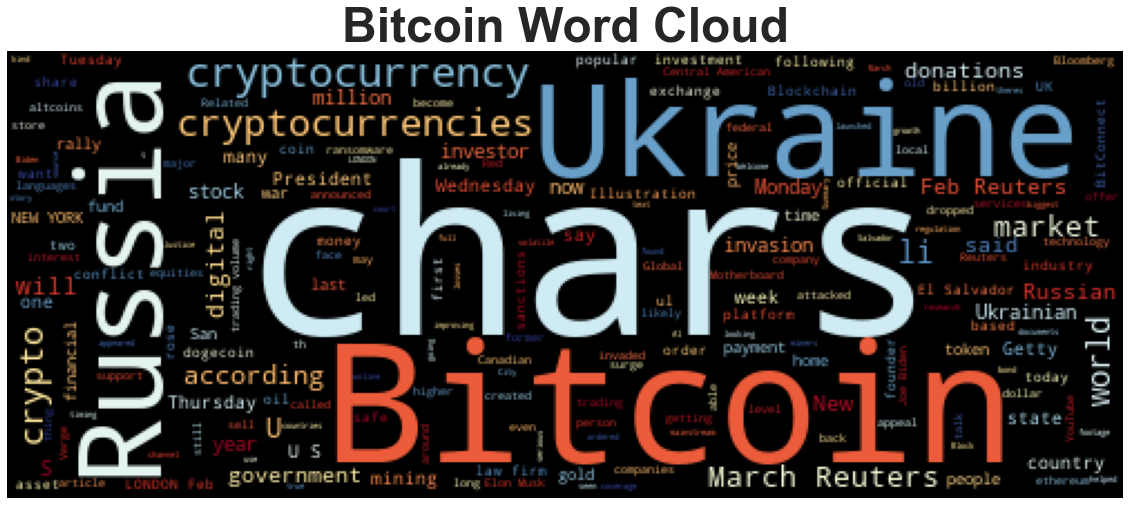

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")


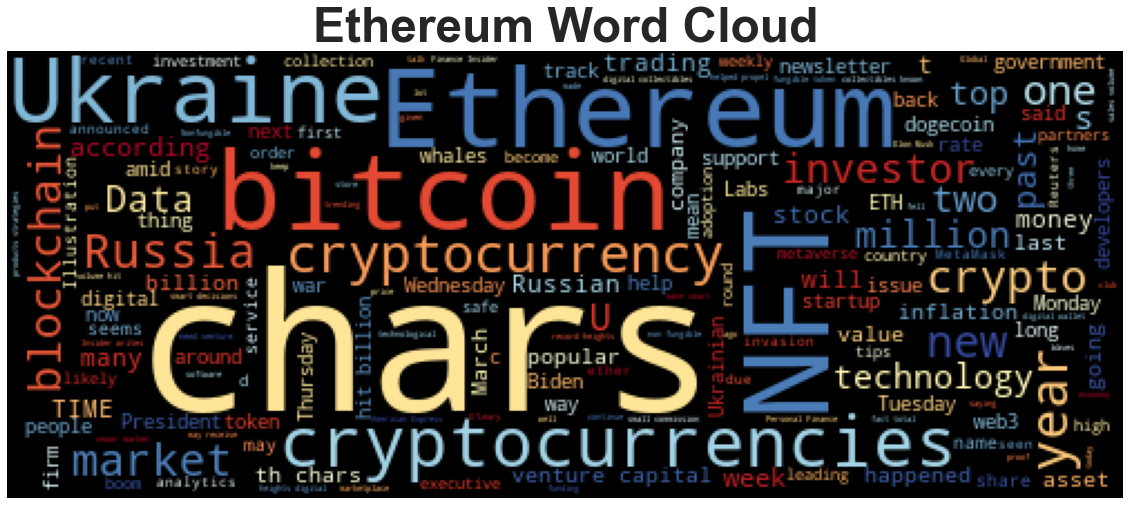

In [25]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text = btc_df.text.str.cat()
btc_text

'Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]"Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as … [+3914 chars]Feb 22 (Reuters) - Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.\r\nThe cryptocurrency\'s spectacular rally in 2021 drew thousands of entrants into mining,… [+4196 chars]March 1 (Reuters) - Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and mo

In [29]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_btc = nlp(btc_text)


# Add a title to the document
# YOUR CODE HERE!
ner_btc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner_btc, jupyter=True, style="ent")

In [31]:
# List all Entities
# YOUR CODE HERE!
for ent in ner_btc.ents:
    print(ent.text, ent.label_)

the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
the New York Times ORG
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
Reuters ORG
Russia GPE
Ukraine GPE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
Satoshi Nakamoto PERSON
2008 DATE
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
15 CARDINAL
Reuters ORG
U.S. GPE
Joe Biden PERSON
Reuters ORG
BITCOIN PERSON
+6882 chars]<ul><li> ORG
Summary</li><li> WORK_OF_ART
Law firms</li><li>
 PERSON
documents</li></ul GPE
Ukrainian NORP
Tom Lee PERSON
Ukraine GPE
Shark Tank WORK_OF_ART
Kevin O'Leary's PERSON
100,000 MONEY
200,000 MONEY
300,000 MONEY
two-week DATE
Tuesday DATE
Russians NORP
Ukrainians NORP
March 11 DATE
Reuters ORG
El Salva

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = eth_df.text.str.cat()
eth_text

'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars]Illustration by James Bareham / The Verge\r\n\n \n\n\n More than $15 million has been donated so far More than $15 million in cryptocurrency has been donated to Ukrainian groups since Russia attacked the c… [+7442 chars]It seems that in 2022, you cant escape from the metaverse.\xa0From Facebook to Microsoft, seemingly every centralized tech firm is clambering on the bandwagon of this emerging virtual reality. For puris… [+5412 chars]If it sounds too good to be true, youre not wrong. Yield farming is riskier than staking. The tokens that are offering such high

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_eth = nlp(eth_text)


# Add a title to the document
# YOUR CODE HERE!
ner_eth.user_data["title"] = "Ethereum NER"

In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner_eth, jupyter=True, style="ent")

In [35]:
# List all Entities
# YOUR CODE HERE!
for ent in ner_eth.ents:
    print(ent.text, ent.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
last year DATE
Between 2020 and 2021 DATE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
Biden PERSON
Wednesday DATE
first ORDINAL
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
$450 million MONEY
Series EVENT
US GPE
over $7 billion MONEY
Russia GPE
Ukraine GPE
days DATE
March 11 DATE
Yuga Labs PERSON
Meebits NORP
Larva Labs PERSON
more than a dozen CARDINAL
Ethereum ORG
American Express ORG
Tuesday DATE
Ukrainian NORP
more than $4 million MONEY
Russia GPE
Elliptic LOC
Ukraine GPE
Russia GPE
Elliptic PRODUCT
nearly $55 million MONEY
Russia GPE
Ukraine GPE
Bloomberg GPE
Getty Images GPE
Bitcoin, Ethereum ORG
DogeCoin ORG
Binance PERSON
June 28, 2021 DATE
R

---